In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [13]:
train_dir = r"C:\Users\admin\Downloads\archive (4)\cifar10\cifar10\train"
test_dir = r"C:\Users\admin\Downloads\archive (4)\cifar10\cifar10\test"

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

In [16]:
train_batch_size = 5000
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=train_batch_size,
    class_mode='categorical'
)

Found 50000 images belonging to 10 classes.


In [17]:
test_batch_size = 1000
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=test_batch_size,
    class_mode='categorical'
)

Found 10000 images belonging to 10 classes.


In [18]:
x_train, y_train =  train_generator[0]
x_test, y_test = test_generator[0]

print(len(x_train))
print(len(x_test))

5000
1000


In [19]:
weights_path = r"C:\Users\admin\Downloads\archive (5)\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))

In [20]:
for layer in base_model.layers:
   layer.trainable = False

In [21]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(x_train, y_train, batch_size=64, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 224ms/step - accuracy: 0.2894 - loss: 1.9755 - val_accuracy: 0.3930 - val_loss: 1.6817
Epoch 2/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 275ms/step - accuracy: 0.4324 - loss: 1.5970 - val_accuracy: 0.4670 - val_loss: 1.4947
Epoch 3/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 289ms/step - accuracy: 0.4872 - loss: 1.4496 - val_accuracy: 0.4820 - val_loss: 1.4405


In [23]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step


In [24]:
labels = list(test_generator.class_indices.keys())

Preditcted:  ship
Actual:  ship


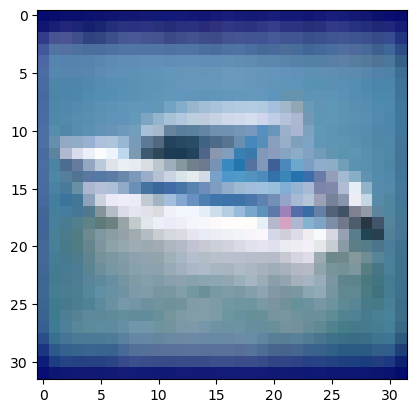

In [25]:
n = 890
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])

Preditcted:  cat
Actual:  dog


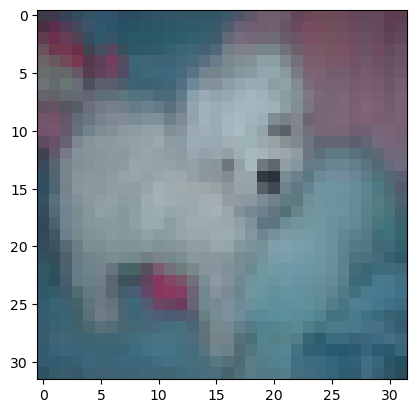

In [26]:
n = 590
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])


Preditcted:  ship
Actual:  ship


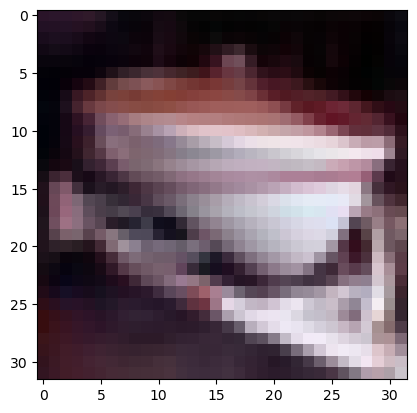

In [27]:
n = 600
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])

Preditcted:  frog
Actual:  cat


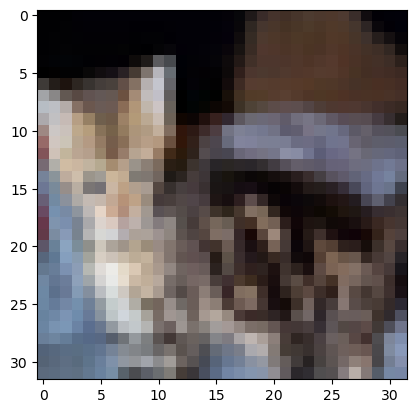

In [29]:
n = 601
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])